In [12]:
import pandas as pd
import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go

def download_nifty_ohlc(start_date, end_date):
    try:
        # Nifty 50 index ticker on Yahoo Finance
        ticker = "^NSEI"
        data = yf.download(ticker, start=start_date, end=end_date)
        return data
    except Exception as e:
        print(f"Error downloading data: {e}")
        return None

# Example usage
start_date = "2019-01-01"
end_date = "2024-11-30"

nifty_data = download_nifty_ohlc(start_date, end_date)

if nifty_data is not None and not nifty_data.empty:
    # Flatten MultiIndex columns (if present)
    nifty_data.columns = ['_'.join(filter(None, col)) if isinstance(col, tuple) else col for col in nifty_data.columns]

    # Rename columns for simplicity
    if 'Close_^NSEI' in nifty_data.columns:
        nifty_data.rename(columns={'Close_^NSEI': 'Close'}, inplace=True)
    if 'Date_' in nifty_data.columns:
        nifty_data.rename(columns={'Date_': 'Date'}, inplace=True)

    if 'High_^NSEI' in nifty_data.columns:
        nifty_data.rename(columns={'High_^NSEI': 'High'}, inplace=True)
    if 'Low_^NSEI' in nifty_data.columns:
        nifty_data.rename(columns={'Low_^NSEI': 'Low'}, inplace=True)

    if 'Open_^NSEI' in nifty_data.columns:
        nifty_data.rename(columns={'Open_^NSEI': 'Open'}, inplace=True)
    if 'Volume_^NSEI' in nifty_data.columns:
        nifty_data.rename(columns={'Volume_^NSEI': 'Volume'}, inplace=True)




    # Reset index and preprocess
    nifty_data.reset_index(inplace=True)
    # nifty_data.dropna(subset=['Close'], inplace=True)
    nifty_data['Close'] = pd.to_numeric(nifty_data['Close'], errors='coerce')

# Basic EDA and visualization
nifty_data = nifty_data[['Date', 'Close', 'High', 'Low', 'Open', 'Volume']]

[*********************100%***********************]  1 of 1 completed


In [13]:
nifty_data.head()

,Date,Close,High,Low,Open,Volume
0,2019-01-02,10792.500000,10895.349609,10735.049805,10868.849609,309700
1,2019-01-03,10672.250000,10814.049805,10661.250000,10796.799805,286200
2,2019-01-04,10727.349609,10741.049805,10628.650391,10699.700195,296600
3,2019-01-07,10771.799805,10835.950195,10750.150391,10804.849609,269400
4,2019-01-08,10802.150391,10818.450195,10733.250000,10786.250000,277700


In [14]:
print(nifty_data.info())
print(nifty_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1457 non-null   datetime64[ns]
 1   Close   1457 non-null   float64       
 2   High    1457 non-null   float64       
 3   Low     1457 non-null   float64       
 4   Open    1457 non-null   float64       
 5   Volume  1457 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 68.4 KB
None
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [15]:
nifty_data

,Date,Close,High,Low,Open,Volume
0,2019-01-02,10792.500000,10895.349609,10735.049805,10868.849609,309700
1,2019-01-03,10672.250000,10814.049805,10661.250000,10796.799805,286200
2,2019-01-04,10727.349609,10741.049805,10628.650391,10699.700195,296600
3,2019-01-07,10771.799805,10835.950195,10750.150391,10804.849609,269400
4,2019-01-08,10802.150391,10818.450195,10733.250000,10786.250000,277700
...,...,...,...,...,...,...
1452,2024-11-25,24221.900391,24351.550781,24135.449219,24253.550781,687200
1453,2024-11-26,24194.500000,24343.300781,24125.400391,24343.300781,230700
1454,2024-11-27,24274.900391,24354.550781,24145.650391,24204.800781,295000
1455,2024-11-28,23914.150391,24345.750000,23873.349609,24274.150391,366700


# Nifty Data Analysis

This dataset contains information about the Nifty index, including daily closing prices, highs, lows, opens, volumes, and technical indicators.  The data spans from 2019-01-02 to 2024-11-29.

**Key Columns/Terms:**

*   **Date:** Date of the observation.
*   **Close:** Closing price of the Nifty index for the day.
*   **High:** Highest price of the Nifty index during the day.
*   **Low:** Lowest price of the Nifty index during the day.
*   **Open:** Opening price of the Nifty index for the day.
*   **Volume:** Trading volume for the day.
*   **SMA_50:** Simple Moving Average of the closing price over the past 50 days.
*   **SMA_200:** Simple Moving Average of the closing price over the past 200 days.
*   **Year:** Year of the observation.
*   **RSI:** Relative Strength Index, a momentum indicator that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset.




#Line Chart of Nifty 50

In [16]:

# Line chart of closing prices
fig = px.line(nifty_data, x='Date', y='Close', title="Nifty 50 Closing Prices Over Time",
              labels={'Date': 'Date', 'Close': 'Closing Price'})
fig.update_layout(xaxis_title="Date", yaxis_title="Closing Price", template="plotly_white")
fig.show()


#NIFTY 50 OHLC CANDLESTICK CHART

In [17]:
fig = go.Figure(data=[go.Candlestick(
    x=nifty_data['Date'],
    open=nifty_data['Open'],
    high=nifty_data['High'],
    low=nifty_data['Low'],
    close=nifty_data['Close']
)])
fig.update_layout(
    title="Nifty 50 OHLC Candlestick Chart",
    xaxis_title="Date",
    yaxis_title="Price",
    template="plotly_white"
)
fig.show()

#NIFTY50 VOLUME OVER TIME

In [18]:
fig = px.bar(nifty_data, x='Date', y='Volume', title="Nifty 50 Volume Over Time",
          labels={'Date': 'Date', 'Volume': 'Volume'})
fig.update_layout(xaxis_title="Date", yaxis_title="Volume", template="plotly_dark")
fig.show()

#Date Range Consistency:
##unexpected gaps in the date range, e.g., holidays, weekends

In [19]:
print(nifty_data['Date'].diff().value_counts())


Date
1 days    1103
3 days     268
2 days      45
4 days      39
5 days       1
Name: count, dtype: int64


#Nifty 50 ohlc vs 50 day and 200 day moving averages


In [20]:
import plotly.graph_objects as go

# Calculate SMAs
nifty_data['SMA_50'] = nifty_data['Close'].rolling(window=50).mean()
nifty_data['SMA_200'] = nifty_data['Close'].rolling(window=200).mean()

# Plot closing price with SMA
fig = go.Figure()

# Add closing price line
fig.add_trace(go.Candlestick(
    x=nifty_data['Date'],
    open=nifty_data['Open'],
    high=nifty_data['High'],
    low=nifty_data['Low'],
    close=nifty_data['Close']
))

# Add SMA 50 line
fig.add_trace(go.Scatter(
    x=nifty_data['Date'], y=nifty_data['SMA_50'],
    mode='lines', name='SMA 50',
    line=dict(color='orange', dash='dot')
))

# Add SMA 200 line
fig.add_trace(go.Scatter(
    x=nifty_data['Date'], y=nifty_data['SMA_200'],
    mode='lines', name='SMA 200',
    line=dict(color='green', dash='dot')
))

# Layout customization
fig.update_layout(
    title="Nifty 50 Closing Price with SMA",
    xaxis_title="Date", yaxis_title="Price",
    template="plotly_white"
)

fig.show()




#Nifty 50 Price and RSI Analysis

In [21]:
import pandas as pd
import numpy as np
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Function to calculate RSI
def calculate_rsi(data, period=14):
    delta = data['Close'].diff(1)  # Difference between consecutive close prices
    gain = delta.where(delta > 0, 0)  # Keep positive gains, replace negatives with 0
    loss = -delta.where(delta < 0, 0)  # Keep negative losses, replace positives with 0

    # Calculate average gain and loss
    avg_gain = gain.rolling(window=period, min_periods=1).mean()
    avg_loss = loss.rolling(window=period, min_periods=1).mean()

    # Calculate RS (Relative Strength) and RSI
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi


nifty_data['RSI'] = calculate_rsi(nifty_data)

# Create subplots with 2 rows: one for price, one for RSI
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,  # Share x-axis between the two plots
    vertical_spacing=0.1,  # Space between the plots
    subplot_titles=("Nifty 50 Price (Candlestick)", "RSI (Relative Strength Index)")
)

# Add candlestick chart for price in the first subplot
fig.add_trace(
    go.Candlestick(
        x=nifty_data.index,
        open=nifty_data['Open'],
        high=nifty_data['High'],
        low=nifty_data['Low'],
        close=nifty_data['Close'],
        name='Price'
    ),
    row=1, col=1
)

# Add RSI line chart in the second subplot
fig.add_trace(
    go.Scatter(
        x=nifty_data.index,
        y=nifty_data['RSI'],
        mode='lines',
        name='RSI',
        line=dict(color='orange')
    ),
    row=2, col=1
)

# Add RSI threshold lines (30 and 70) in the second subplot
fig.add_shape(
    type="line", x0=nifty_data.index.min(), x1=nifty_data.index.max(),
    y0=70, y1=70, line=dict(color="red", width=1, dash="dash"),
    row=2, col=1
)
fig.add_shape(
    type="line", x0=nifty_data.index.min(), x1=nifty_data.index.max(),
    y0=30, y1=30, line=dict(color="green", width=1, dash="dash"),
    row=2, col=1
)

# Update layout for better visualization
fig.update_layout(
    title="Nifty 50 Price and RSI Analysis",
    xaxis2_title="Date",  # Add x-axis label to the second plot
    yaxis1_title="Price",
    yaxis2_title="RSI",
    template="plotly_white",
    height=800  # Adjust height for better readability
)

# Show the plot
fig.show()


#Volume-Price Correlation of Nifty 50

In [22]:
volume_price_corr = nifty_data['Volume'].corr(nifty_data['Close'])
print(f"Volume-Price Correlation: {volume_price_corr}")


Volume-Price Correlation: -0.5650049149287922


#Yearly Average Closing Price of Nifty 50

In [23]:
# Extract year
nifty_data['Year'] = nifty_data['Date'].dt.year

# Group by year and calculate mean close price
yearly_trend = nifty_data.groupby('Year')['Close'].mean().reset_index()

# Plot
fig = px.bar(
    yearly_trend, x='Year', y='Close',
    title="Yearly Average Closing Price of Nifty 50",
    labels={'Year': 'Year', 'Close': 'Average Closing Price'},
    text_auto=True
)
fig.update_layout(template="plotly_white")
fig.show()


#Model Training on Nifty 50

In [24]:
nifty_data.head(1)

,Date,Close,High,Low,Open,Volume,SMA_50,SMA_200,RSI,Year
0,2019-01-02,10792.5,10895.349609,10735.049805,10868.849609,309700,NaN,NaN,NaN,2019


In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

# Load and preprocess the data
data = nifty_data.copy()

# Ensure the 'Date' column is a datetime object
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Select features for the model
features = ['Close', 'High', 'Low', 'Open','Volume']
data = data[features]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])  # Take seq_length data points
        y.append(data[i, 0])  # Predict the 'Close' price
    return np.array(X), np.array(y)

# Parameters
sequence_length = 60  # Use past 50 days to predict the next day

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Split into train and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)  # Predict the next 'Close' price
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))



Epoch 1/100
35/35 [==============================] - 6s 80ms/step - loss: 0.0178 - val_loss: 0.0214
Epoch 2/100
35/35 [==============================] - 2s 58ms/step - loss: 0.0030 - val_loss: 0.0106
Epoch 3/100
35/35 [==============================] - 2s 65ms/step - loss: 0.0022 - val_loss: 0.0060
Epoch 4/100
35/35 [==============================] - 2s 47ms/step - loss: 0.0022 - val_loss: 0.0062
Epoch 5/100
35/35 [==============================] - 2s 44ms/step - loss: 0.0018 - val_loss: 0.0030
Epoch 6/100
35/35 [==============================] - 2s 46ms/step - loss: 0.0017 - val_loss: 0.0030
Epoch 7/100
35/35 [==============================] - 2s 46ms/step - loss: 0.0016 - val_loss: 0.0029
Epoch 8/100
35/35 [==============================] - 2s 45ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 9/100
35/35 [==============================] - 2s 46ms/step - loss: 0.0014 - val_loss: 0.0023
Epoch 10/100
35/35 [==============================] - 2s 48ms/step - loss: 0.0014 - val_loss: 0.0014

9/9 [==============================] - 1s 15ms/step
Root Mean Squared Error (RMSE): 817.90


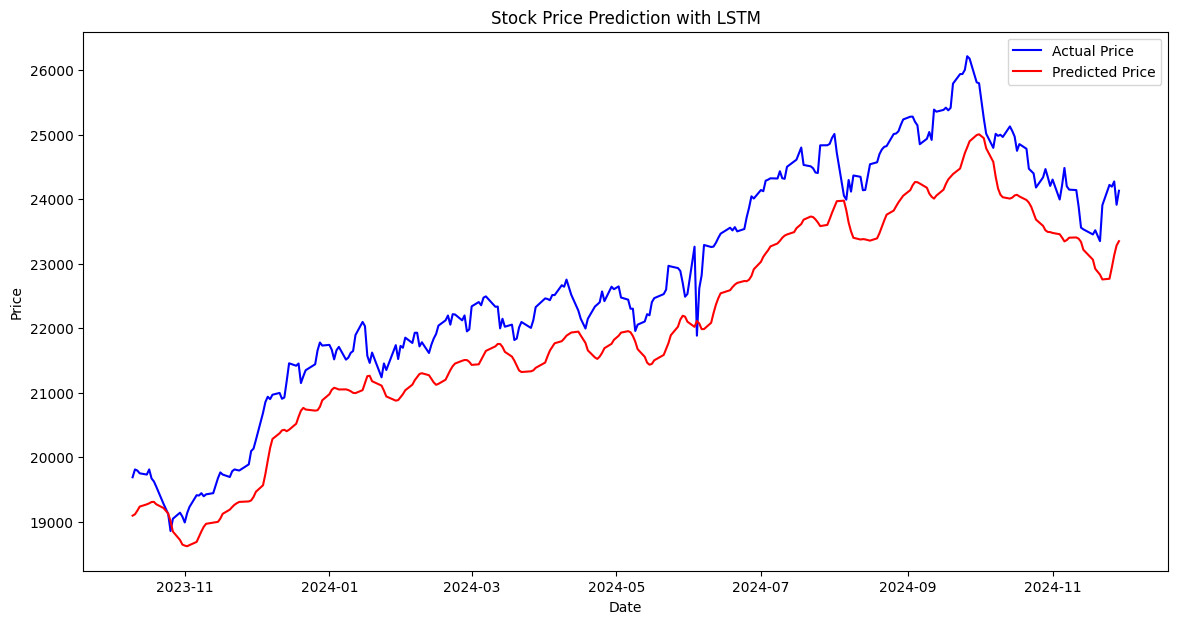

In [26]:

# Make predictions
predictions = model.predict(X_test)

# Invert scaling
predictions = scaler.inverse_transform(np.concatenate([predictions, np.zeros((predictions.shape[0], scaled_data.shape[1]-1))], axis=1))[:, 0]
y_test = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled_data.shape[1]-1))], axis=1))[:, 0]

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot actual vs predicted prices
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Price', color='blue')
plt.plot(data.index[-len(y_test):], predictions, label='Predicted Price', color='red')
plt.title('Stock Price Prediction with LSTM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [27]:
# Step 1: Extract the last sequence from the data
last_sequence = scaled_data[-sequence_length:]  # Last 50 rows (if sequence_length=50)

# Step 2: Reshape to match the model input shape
last_sequence = last_sequence.reshape(1, sequence_length, scaled_data.shape[1])  # (1, 50, number_of_features)

# Step 3: Predict the next day's price
predicted_scaled_price = model.predict(last_sequence)

# Step 4: Invert scaling to get the original price
predicted_price = scaler.inverse_transform(
    np.concatenate([predicted_scaled_price, np.zeros((1, scaled_data.shape[1] - 1))], axis=1)
)[0, 0]  # Extract the 'Close' price

print(f"Predicted price for Next Days Close: {predicted_price:.2f}")


1/1 [==============================] - 0s 29ms/step
Predicted price for Next Days Close: 23349.63


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            11200     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 32701 (127.74 KB)
Trainable params: 32701 

## Model Architecture

The LSTM model is designed for time series forecasting using sequential data. It consists of multiple layers as outlined below:

### Layers
1. **Input Layer**:
   - Takes sequences of 50 time steps (sequence_length) with 4 features (`Close`, `High`, `Low`, `Open`).

2. **LSTM Layer 1**:
   - **Units**: 50 (memory cells).
   - **Purpose**: Captures temporal patterns in stock prices.

3. **Dropout Layer 1**:
   - **Rate**: 20% (prevents overfitting).

4. **LSTM Layer 2**:
   - **Units**: 50.
   - **Purpose**: Further processes sequential patterns and outputs only the final state.

5. **Dense Layer**:
   - **Units**: 25.
   - **Purpose**: Adds complexity and learns non-linear relationships.

6. **Output Layer**:
   - **Units**: 1.
   - **Purpose**: Predicts the stock price for the next time step.

### Hyperparameters
- **Sequence Length**: 60 days.
- **Batch Size**: 32.
- **Epochs**: 100.
- **Optimizer**: Adam.
- **Loss Function**: Mean Squared Error (MSE).

